## Linear Regression: Predict life expectancy from birth rate

### Dataset Description
- Name: Birth rate - life expectancy in 2010
- X = birth rate. Type: float.
- Y = life expectancy. Type: foat.
- Number of datapoints: 190


### Approach 1
assume that the relationship between the birth rate and the life expectancy is linear, which means that we can find w and b such that Y = wX + b

### 3_linreg_placeholder.py

In [24]:
import time
import os
print(os.getcwd())

/Users/surkpark/cs20si_study


In [2]:
import sys
sys.path.append(os.getcwd()+"/examples")

In [5]:
import tensorflow as tf

import utils

DATA_FILE = "./examples/data/birth_life_2010.txt"

In [6]:
# Step 1: read in data from the .txt file
# data is a numpy array of shape (190, 2), each row is a datapoint
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [7]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')


In [8]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [9]:
# Step 4: construct model to predict Y (life expectancy from birth rate)
Y_predicted = w * X + b 


In [10]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

In [11]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [12]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    
    # Step 8: train the model
    for i in range(100): # run 100 epochs
        for x, y in data:
        # Session runs train_op to minimize loss
            sess.run(optimizer, feed_dict={X: x, Y:y}) 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 

### 03_linreg_dataset.py

In [13]:
import time
import os
print(os.getcwd())

/Users/surkpark/cs20si_study


In [14]:
import sys
sys.path.append(os.getcwd()+"/examples")

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

DATA_FILE = "./examples/data/birth_life_2010.txt"

In [16]:
# Step 1: read in the data
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [17]:
# Step 2: create Dataset and iterator
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

In [19]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights1', initializer=tf.constant(0.0))
b = tf.get_variable('bias1', initializer=tf.constant(0.0))

In [20]:
# Step 4: build model to predict Y
Y_predicted = X * w + b

In [21]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss1')
# loss = utils.huber_loss(Y, Y_predicted)

In [22]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [25]:
start = time.time()
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        sess.run(iterator.initializer) # initialize the iterator
        total_loss = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss]) 
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
            
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 
    print('w: %f, b: %f' %(w_out, b_out))
print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1661.863764550287
Epoch 1: 956.3224439573916
Epoch 2: 844.6737683409139
Epoch 3: 750.7312372197838
Epoch 4: 667.659830722252
Epoch 5: 594.1417484349327
Epoch 6: 529.0787271179651
Epoch 7: 471.5003584364135
Epoch 8: 420.5458252520938
Epoch 9: 375.45531067297253
Epoch 10: 335.55436177954664
Epoch 11: 300.24627770512666
Epoch 12: 269.00374521501146
Epoch 13: 241.3595776562824
Epoch 14: 216.9003910217238
Epoch 15: 195.25972397061292
Epoch 16: 176.1137731664483
Epoch 17: 159.17551683403158
Epoch 18: 144.19069889799545
Epoch 19: 130.93503690609023
Epoch 20: 119.20935661137888
Epoch 21: 108.83793506244884
Epoch 22: 99.66458668207358
Epoch 23: 91.55171666162971
Epoch 24: 84.37658985632197
Epoch 25: 78.03213362396008
Epoch 26: 72.42178616552172
Epoch 27: 67.46132107331957
Epoch 28: 63.07563027821873
Epoch 29: 59.19871881428714
Epoch 30: 55.77163058824279
Epoch 31: 52.742706123048954
Epoch 32: 50.06563247971506
Epoch 33: 47.70006537150391
Epoch 34: 45.61017402416389
Epoch 35: 43.7637948

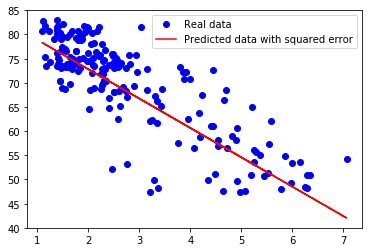

In [26]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data with squared error')
# plt.plot(data[:,0], data[:,0] * (-5.883589) + 85.124306, 'g', label='Predicted data with Huber loss')
plt.legend()
plt.show()

### Ypredicted = wX2 + uX + b

In [28]:
import time
import os
print(os.getcwd())

/Users/surkpark/cs20si_study


In [29]:
import sys
sys.path.append(os.getcwd()+"/examples")

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

DATA_FILE = "./examples/data/birth_life_2010.txt"

In [31]:
# Step 1: read in the data
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [32]:
# Step 2: create Dataset and iterator
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

In [33]:
# Step 3: create variables: weights_1, weights_2, bias. All are initialized to 0
w = tf.get_variable('weights2_1', initializer=tf.constant(0.0))
u = tf.get_variable('weights2_2', initializer=tf.constant(0.0))
b = tf.get_variable('bias2', initializer=tf.constant(0.0))

In [34]:
# Step 4: predict Y (number of theft) from the number of fire
Y_predicted = w * X * X + X * u + b 


In [35]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss2')
# loss = utils.huber_loss(Y, Y_predicted)

In [36]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [40]:
start = time.time()
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    writer = tf.summary.FileWriter('./graphs/linear_reg_w_u_b', sess.graph)
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        sess.run(iterator.initializer) # initialize the iterator
        total_loss = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss]) 
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
            
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, u_out, b_out = sess.run([w, u, b]) 
    print('w: %f, u: %f, b: %f' %(w_out, u_out, b_out))
print('Took: %f seconds' %(time.time() - start))

Epoch 0: 6667.124520063606
Epoch 1: 2726.341366068058
Epoch 2: 1156.1030509773054
Epoch 3: 575.7249887449667
Epoch 4: 394.1428861893713
Epoch 5: 362.38057664737323
Epoch 6: 379.00427846384576
Epoch 7: 405.09331353007065
Epoch 8: 427.44813598770355
Epoch 9: 442.92292649557714
Epoch 10: 451.9183325590958
Epoch 11: 455.8031890631169
Epoch 12: 455.97431112399426
Epoch 13: 453.5669178753503
Epoch 14: 449.43275955323327
Epoch 15: 444.1729752268446
Epoch 16: 438.20322023465445
Epoch 17: 431.80534060579896
Epoch 18: 425.170380970098
Epoch 19: 418.4206185020016
Epoch 20: 411.6414175366689
Epoch 21: 404.8866560838087
Epoch 22: 398.1911454046684
Epoch 23: 391.5757295387454
Epoch 24: 385.0565431426279
Epoch 25: 378.6411181249659
Epoch 26: 372.3349986873469
Epoch 27: 366.1402077506456
Epoch 28: 360.055155062412
Epoch 29: 354.08361166430467
Epoch 30: 348.2226608333766
Epoch 31: 342.47157505520767
Epoch 32: 336.8288551838088
Epoch 33: 331.2935198955728
Epoch 34: 325.8626169196428
Epoch 35: 320.535315

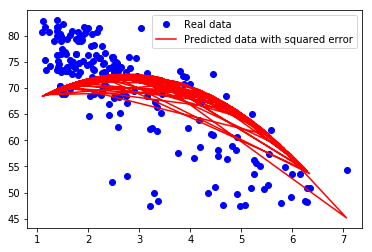

In [41]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * data[:,0] * w_out + data[:,0] * u_out + b_out, 'r', label='Predicted data with squared error')
# plt.plot(data[:,0], data[:,0] * data[:,0] * (-1.484956) + data[:,0] * (8.214778) + 61.223866, 'g', label='Predicted data with Huber loss')
plt.legend()
plt.show()

## Control flow: Huber loss

### To implement 'Huber loss' in TensorFlow, we might be tempted to use something Pythonic such as:


In [ ]:
if tf.abs(Y_predicted - Y) <= delta:
    do something

### However, this approach would only work if TensorFlow's eager execution were enabled, which we will learn about in the next lecture. If we use the current version, TensorFlow would soon notify us that “TypeError: Using a `tf.Tensor` as a Python `bool` is not allowed.” We will need to use control flow ops defined by TensorFlow. For the full list of those ops, please visit the official documentation. 

- Control Flow Ops : tf.count_up_to, tf.cond, tf.case, tf.while_loop, tf.group ...
- Comparison Ops : tf.equal, tf.not_equal, tf.less, tf.greater, tf.where, ...
- Logical Ops : tf.logical_and, tf.logical_not, tf.logical_or, tf.logical_xor
- Debugging Ops : tf.is_finite, tf.is_inf, tf.is_nan, tf.Assert, tf.Print, ...

In [ ]:
def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

## tf.data

### With tf.data, instead of storing our input data in a non-TensorFlow object, we store it in a tf.data.Dataset object. We can create a Dataset from tensors with:

tf.data.Dataset.from_tensor_slices((features, labels))

### features and labels are supposed to be tensors, but remember that since TensorFlow and Numpy are seamlessly integrated, they can be NumPy arrays. We can initialize our dataset as followed:

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

In [ ]:
print(dataset.output_types)			# >> (tf.float32, tf.float32)
print(dataset.output_shapes)		       # >> (TensorShape([]), TensorShape([]))

### You can also create a tf.data.Dataset from files using one of TensorFlow’s file format parsers, all of them have striking similarity to the old DataReader.
- tf.data.TextLineDataset(filenames): each of the line in those files will become one entry. It’s good for datasets whose entries are delimited by newlines such as data used for machine translation or data in csv files.
- tf.data.FixedLengthRecordDataset(filenames): each of the data point in this dataset is of the same length. It’s good for datasets whose entries are of a fixed length, such as CIFAR or ImageNet.
- tf.data.TFRecordDataset(filenames): it’s good to use if your data is stored in tfrecord format.


### After we have turned our data into a magical Dataset object, we can iterate through samples in this Dataset using an iterator. An iterator iterates through the Dataset and returns a new sample or batch each time we call get_next(). Let’s start with make_one_shot_iterator(), we’ll find out what it is in a bit. The iterator is of the class tf.data.Iterator.

In [ ]:
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()         # X is the birth rate, Y is the life expectancy

### Each time we execute ops X, Y, we get a new data point.

In [ ]:
with tf.Session() as sess:
    print(sess.run([X, Y]))		# >> [1.822, 74.82825]
    print(sess.run([X, Y]))		# >> [3.869, 70.81949]
    print(sess.run([X, Y]))		# >> [3.911, 72.15066]

### Now we can just compute Y_predicted and losses from X and Y just like you did with placeholders. The difference is that when you execute your graph, you no longer need to supplement data through feed_dict.

In [ ]:
for i in range(100): # train the model 100 epochs
        total_loss = 0
        try:
            while True:
                sess.run([optimizer]) 
        except tf.errors.OutOfRangeError:
            pass

We have to catch the OutOfRangeError because miraculously, TensorFlow doesn’t automatically catch it for us. If we run this code, we will see that we only get non zero loss in the first epoch. After that, the loss is always 0. It’s because dataset.make_one_shot_iterator() literally gives you only one shot. It’s fast to use -- you don’t have to initialize it -- but it can be used only once. After one epoch, you reach the end of your data and you can’t re-initialize it for the next epoch.

### To use for multiple epochs, we use dataset.make_initializable_iterator(). At the beginning of each epoch, you have to re-initialize your iterator.

In [ ]:
iterator = dataset.make_initializable_iterator()
...
for i in range(100): 
        sess.run(iterator.initializer) 
        total_loss = 0
        try:
            while True:
                sess.run([optimizer]) 
        except tf.errors.OutOfRangeError:
            pass

### With tf.data.Dataset, you can batch, shuffle, repeat your data with just one command. You can also map each element of your dataset to transform it in a specific way to create a new dataset.

In [ ]:
dataset = dataset.shuffle(1000)
dataset = dataset.repeat(100)
dataset = dataset.batch(128)
dataset = dataset.map(lambda x: tf.one_hot(x, 10)) 
# convert each element of dataset to one_hot vector


### Does tf.data really perform better?

To compare the performance of tf.data with that of placeholders, I ran each model 100 times and calculated the average time each model took. On my Macbook Pro with 2.7 GHz Intel Core i5, the model with placeholder took on average 9.05271519 seconds, while the model with tf.data took on average 6.12285947 seconds. tf.data improves the performance by 32.4% compared to placeholders!m